In [1]:
# Packages utilisés dans la suite
library(randomForest)
library(caTools)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
# Reading training data
data_train_name <- load("spam_data_train.rda")
data_train <- eval(as.symbol(data_train_name))
print(dim(data_train))
head(data_train, n=5)

[1] 2588   58


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
455,0.0,0.0,0.89,0,1.79,0.44,0.00,0.00,0.00,0.00,⋯,0,0.073,0.000,0.000,0.00,0.000,2.250,12,144,1
2246,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.000,0.000,0.277,0.00,0.000,3.000,17,51,0
1935,0.0,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0,0.377,0.000,0.125,0.00,0.000,2.925,27,158,0
1384,0.0,0.0,0.00,0,1.82,0.36,0.36,0.72,0.36,0.36,⋯,0,0.297,0.059,0.178,0.00,0.000,2.446,11,115,1
679,0.1,0.1,0.70,0,0.60,0.20,0.40,0.10,1.41,0.80,⋯,0,0.000,0.260,0.991,0.39,0.032,3.173,56,1044,1


In [3]:
#splitting dataset into training and test set
set.seed(101) 
sample = sample.split(data_train, SplitRatio = .8)
train = subset(data_train, sample == TRUE)
test  = subset(data_train, sample == FALSE)

In [4]:
# Separating features and target variables
data_train_x <-train[, 1:57] 
data_train_y <- as.factor(train$label)

data_test_x <-test[, 1:57]
data_test_y <-as.factor(test[,58])



Call:
 randomForest(x = data_train_x, y = data_train_y) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 5.46%
Confusion matrix:
     0   1 class.error
0 1219  38  0.03023071
1   74 722  0.09296482


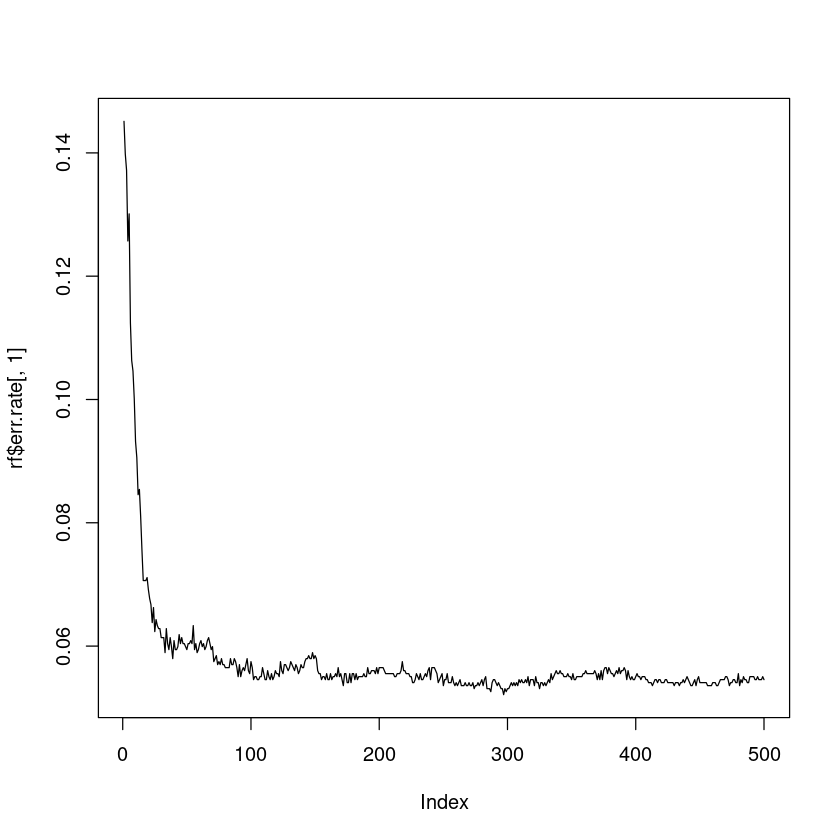

In [5]:
# Forêts aléatoires
rf <- randomForest(x = data_train_x, y = data_train_y)
# Évolution de l’erreur en fonction du nombre d’arbres
# Ici ntree est fixé à la valeur par défaut = 500
plot(rf$err.rate[,1], type="l")
# Affichage des résultats
print(rf)

,MeanDecreaseGini
word_freq_make,3.8112603
word_freq_address,4.0330140
word_freq_all,11.0814733
word_freq_3d,1.0838299
word_freq_our,32.1724509
word_freq_over,6.2525734
word_freq_remove,80.8767834
word_freq_internet,11.9020997
word_freq_order,5.6797608
word_freq_mail,10.1439299


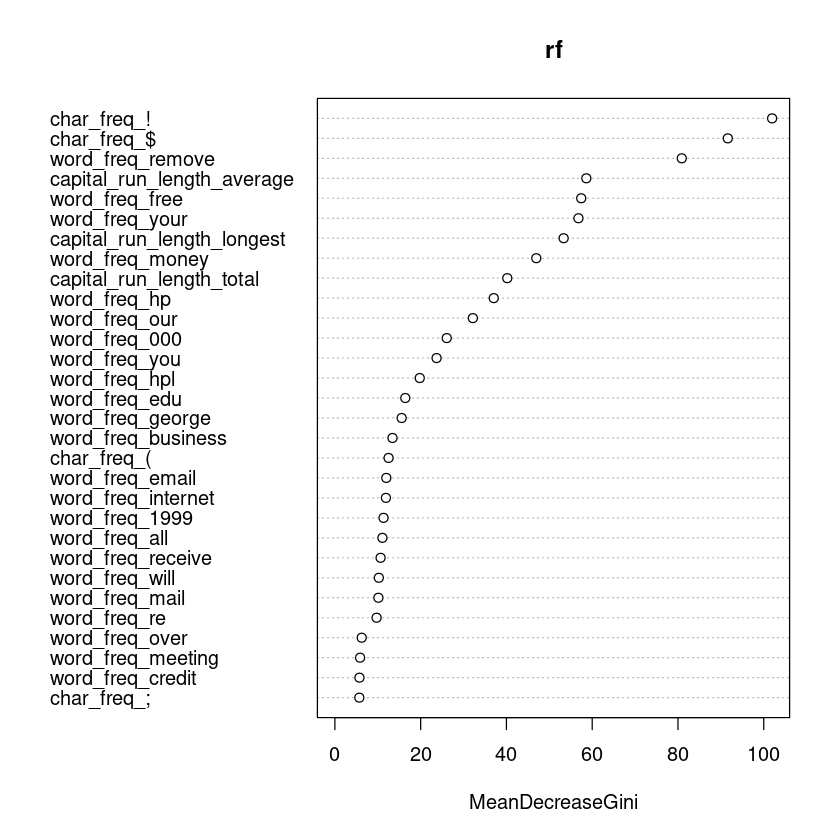

In [6]:
# Importance des variables
rf$importance
varImpPlot(rf)

In [7]:
# Prediction sur les données test
rf_predit_data_test <- predict(rf, newdata=data_test_x)
# Comparaison des valeurs prédites et des valeurs observées
table(rf_predit_data_test, data_test_y)
# Calcul du taux d’erreur
error_rate <- mean(rf_predit_data_test != data_test_y)
cat("error_rate using test data = ",error_rate)

                   data_test_y
rf_predit_data_test   0   1
                  0 319  20
                  1  12 184

error_rate using test data =  0.05981308

In [8]:
# Calculating the mean and standard deviation of data variables
mean_data_train <- apply(data_train_x,2,mean)
std_data_train <- apply(data_train_x,2,sd)
#stat_data_train <- rbind(mean_data_train,std_data_train)

mean_data_test <- apply(data_test_x,2,mean)
std_data_test <- apply(data_test_x,2,sd)
#stat_data_test <- rbind(mean_data_test,std_data_test)

In [9]:
#Data normalization 
norm_data_train_x <- sweep(data_train_x, 2, mean_data_train, "-")
norm_data_train_x <- sweep(norm_data_train_x, 2, std_data_train, "/")

norm_data_test_x <- sweep(data_test_x, 2, mean_data_test, "-")
norm_data_test_x <- sweep(norm_data_test_x, 2, std_data_test, "/")


Call:
 randomForest(x = norm_data_train_x, y = data_train_y) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 5.65%
Confusion matrix:
     0   1 class.error
0 1217  40  0.03182180
1   76 720  0.09547739


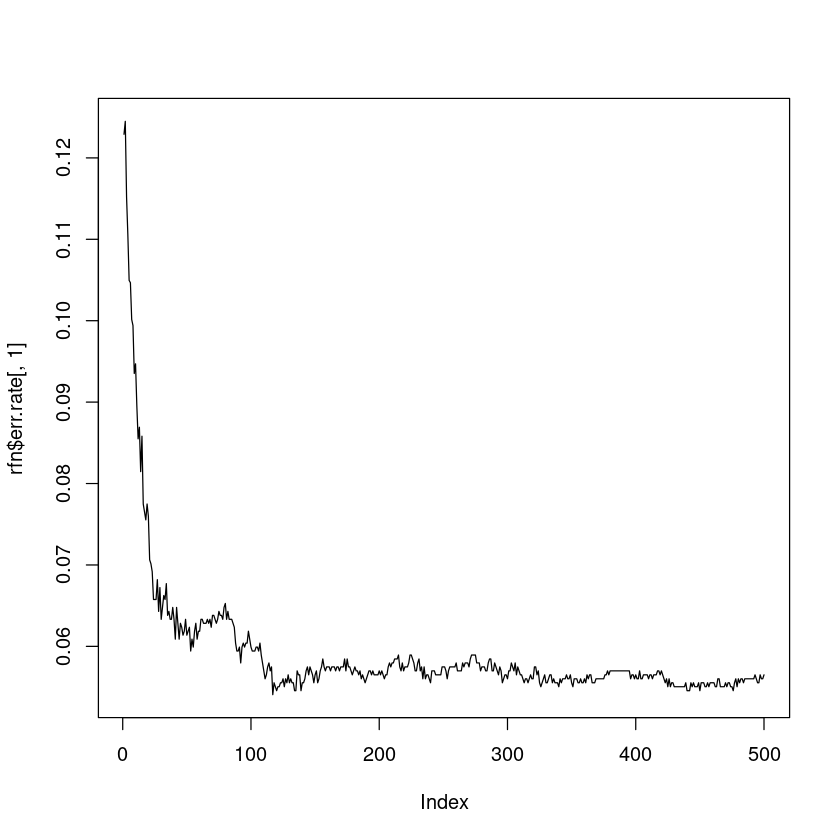

In [10]:
# Forêts aléatoires
rfn <- randomForest(x = norm_data_train_x, y = data_train_y)
# Évolution de l’erreur en fonction du nombre d’arbres
# Ici ntree est fixé à la valeur par défaut = 500
plot(rfn$err.rate[,1], type="l")
# Affichage des résultats
print(rfn)

,MeanDecreaseGini
word_freq_make,3.6455500
word_freq_address,4.8758209
word_freq_all,10.9205425
word_freq_3d,1.0959187
word_freq_our,36.0160312
word_freq_over,7.6057167
word_freq_remove,79.3443742
word_freq_internet,12.6909424
word_freq_order,5.8977478
word_freq_mail,9.5230617


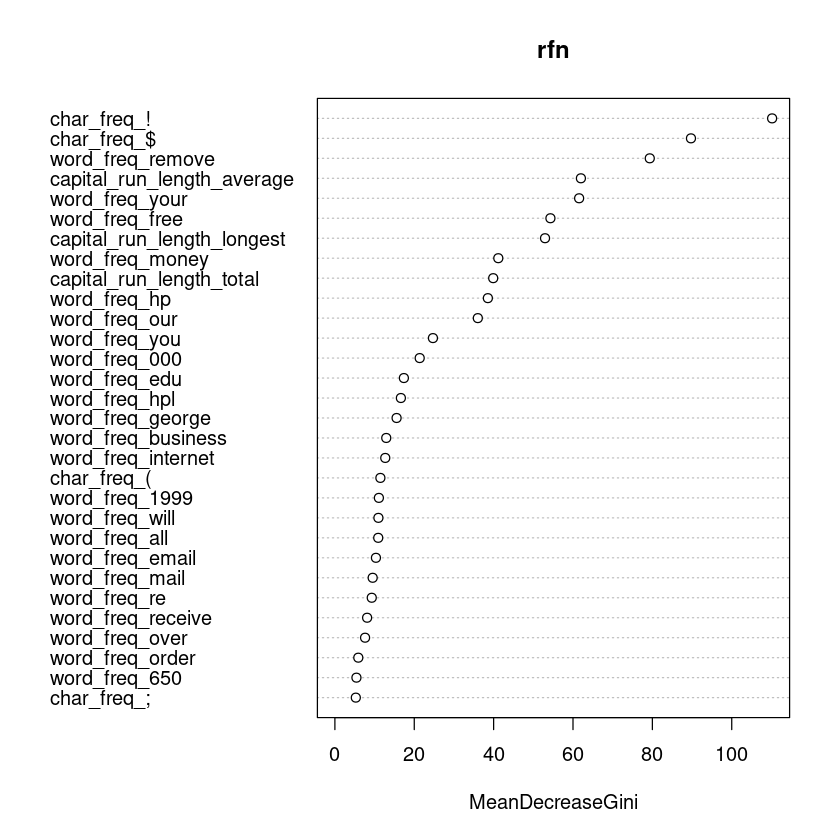

In [11]:
# Importance des variables
rfn$importance
varImpPlot(rfn)

In [12]:
# Prediction sur les données test
rfn_predit_data_test <- predict(rfn, newdata=norm_data_test_x)
# Comparaison des valeurs prédites et des valeurs observées
table(rfn_predit_data_test, data_test_y)
# Calcul du taux d’erreur
error_rate_n <- mean(rfn_predit_data_test != data_test_y)
cat("error_rate using test data = ",error_rate_n)

                    data_test_y
rfn_predit_data_test   0   1
                   0 309  24
                   1  22 180

error_rate using test data =  0.08598131